In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [141]:
# https://www.ue.katowice.pl/fileadmin/_migrated/content_uploads/7_B.Fraczek_Analiza_Czynnikow....pdf
df = pd.read_excel("datasets/cleaned.xlsx", sheet_name = ["Polska"])["Polska"]
df = df.fillna(df.mean())

In [142]:
df.set_index("Rok", inplace=True)

In [143]:
# Kolumny z odpowiednią wartością wariancji 
cols = df.columns[df.std() / df.mean() > 0.2].values
cols: list = cols.tolist()
cols.remove("Procent dochodu rozporządzalnego przeznaczany na oszczędności")

In [144]:
from scipy.stats import t

alpha = 0.05
N = len(df)
t = t.ppf(1 - alpha, N-2)
r = np.sqrt(t**2/(t**2 + N - 2))
r

0.35982694082255134

In [145]:
corr = df[cols].corr()
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

In [146]:
nx.get_edge_attributes(G, 'value')

{('Procent dochodu rozporzązdalnego przeznaczanego na spłatę długów',
  'Suma aktyw gospodarstw domowych w dolarach per capita'): 0.857,
 ('Procent dochodu rozporzązdalnego przeznaczanego na spłatę długów',
  'Przeciętne roczne wynagrodzenie (dane z ZUSu)'): 0.879,
 ('Procent dochodu rozporzązdalnego przeznaczanego na spłatę długów',
  'Cena 1 m2 powierzchni użytkowej budynku mieszkalnego oddanego do użytkowania'): 0.942,
 ('Suma aktyw gospodarstw domowych w dolarach per capita',
  'Przeciętne roczne wynagrodzenie (dane z ZUSu)'): 0.991,
 ('Suma aktyw gospodarstw domowych w dolarach per capita',
  'Cena 1 m2 powierzchni użytkowej budynku mieszkalnego oddanego do użytkowania'): 0.906,
 ('Przeciętne roczne wynagrodzenie (dane z ZUSu)',
  'Cena 1 m2 powierzchni użytkowej budynku mieszkalnego oddanego do użytkowania'): 0.935,
 ('Rezerwy ubezpieczeń na życie (wyrażone w procetach zobowiązań, których pokrycie w środkach muszą posiadać ubezpieczyciele)',
  'Średnia stopa bezrobocia'): 0.541,


/tmp/ipykernel_25743/323351926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  links_filtered.loc[:,"value"] = np.round(links_filtered.loc[:,"value"], 3)


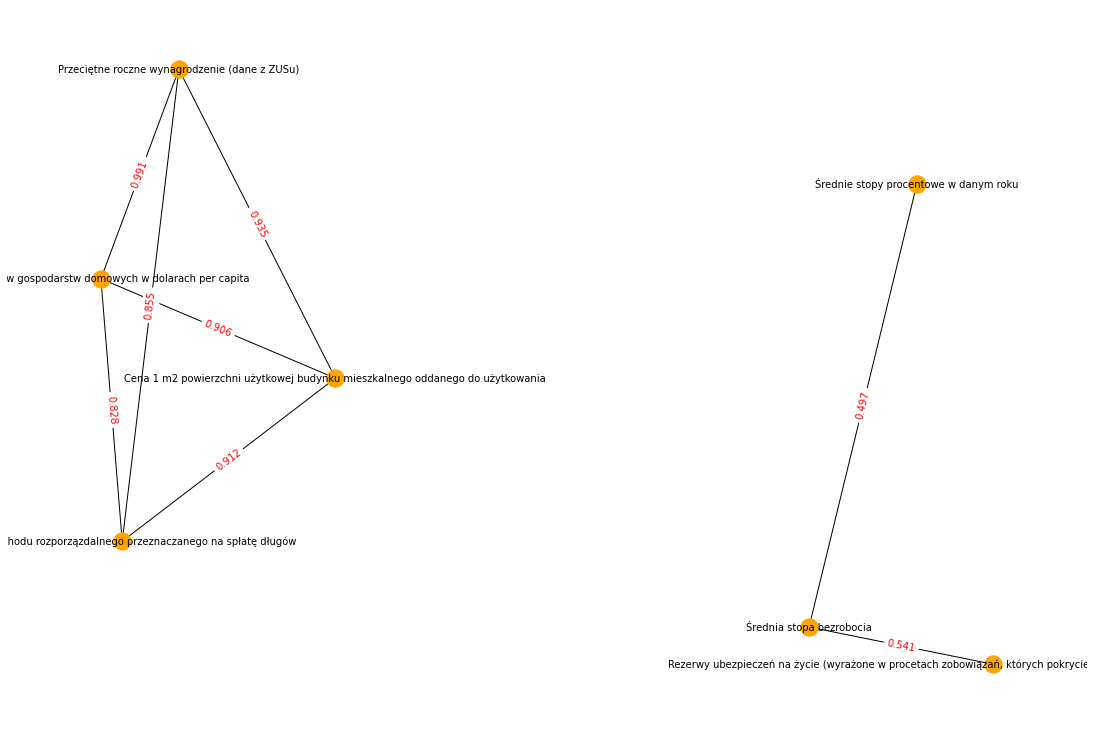

In [147]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] > r) & (links['var1'] != links['var2']) ]
links_filtered.loc[:,"value"] = np.round(links_filtered.loc[:,"value"], 3)
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2', edge_attr=True)
pos = nx.spring_layout(G, k= 1)
 
# Plot the network:
plt.figure(figsize=(15, 10))
nx.draw(G,pos, with_labels=True, node_color='orange', edge_color='black', linewidths=1, font_size=10)
edge_labels = nx.get_edge_attributes(G,'value')
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,font_color='red')
plt.show()

In [172]:
best = ["Średnia stopa bezrobocia", 'Procent dochodu rozporzązdalnego przeznaczanego na spłatę długów']

In [173]:
X = df.loc[:, best]
y = df.loc[:, "Procent dochodu rozporządzalnego przeznaczany na oszczędności"]

In [174]:
df.loc[:, ["Procent dochodu rozporządzalnego przeznaczany na oszczędności"] + best]

,Procent dochodu rozporządzalnego przeznaczany na oszczędności,Średnia stopa bezrobocia,Procent dochodu rozporzązdalnego przeznaczanego na spłatę długów
Rok,,,
1999,9.946499,11.991667,10.721940
2000,10.153177,14.008333,11.826970
2001,11.655554,16.225000,17.741950
2002,8.270142,19.916667,45.160798
2003,7.302362,19.508333,19.775300
2004,2.495094,18.191667,21.567750
2005,1.806936,16.191667,25.082940
2006,2.051941,12.691667,31.143080
2007,1.739163,9.816667,39.403020


In [175]:
model = sm.OLS(y, X)

In [176]:
results = model.fit()
print(results.summary2())

                                              Results: Ordinary least squares
Model:                  OLS                                                           Adj. R-squared (uncentered): 0.585   
Dependent Variable:     Procent dochodu rozporządzalnego przeznaczany na oszczędności AIC:                         115.5426
Date:                   2022-05-20 22:50                                              BIC:                         117.7247
No. Observations:       22                                                            Log-Likelihood:              -55.771 
Df Model:               2                                                             F-statistic:                 16.48   
Df Residuals:           20                                                            Prob (F-statistic):          5.91e-05
R-squared (uncentered): 0.622                                                         Scale:                       10.253  
------------------------------------------------------